# Прогноз уровня дохода


In [ ]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# загружаем датасет
data = pd.read_csv('adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
# проверим, есть ли пропущенные значения
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
data.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Несмотря на то, что проверка показала, что пропущенных значений нет, из описания датасета известно, что значения пропущены в следующих столбцах:  2 (workclass), 7 (occupation) and 14 (native-country).
Посмотрим на уникальные значения в этих столбцах.

In [ ]:
data.occupation.unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [ ]:
data.workclass.unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [ ]:
data['native-country'].unique()

array(['United-States', '?', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

Видим знаки вопроса '?' во всех трех признаках. Видимо, это пропущенные значения. Загрузим датасет, превратив '?' в NaN.

In [ ]:
data = pd.read_csv('adult.csv', na_values='?')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
data.isna().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

Удалим пропущенные значения, используя булеву маску:

In [ ]:
data = data[~(data.workclass.isna())]
data = data[~(data.occupation.isna())]
data = data[~(data['native-country'].isna())]

In [ ]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [ ]:
data.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Вместо удаления можно было попытаться заполнить пропуски.

Например, чтобы заполнить сферу деятельности ('occupation'), можно было найти моду для каждой из групп уровня образования ('educational-num').

Ниже, на графике зависимости сферы занятости от уровня образования, можно заметить, что работа в секторах 'Prof-specialty' и 'Exec-managerial' требует, в среднем, более высокого уровня образования, что, в общем, логично: это специалисты и управленцы. Гораздо ниже средний уровень образования у сектора 'Priv-house-serv'. По-видимому, это домашняя обслуга.

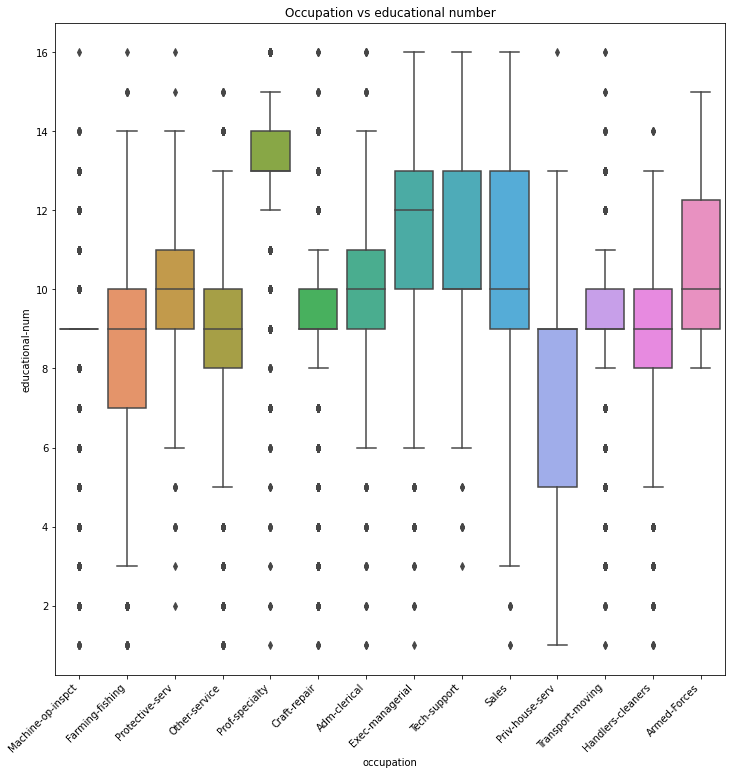

In [ ]:
f, ax = plt.subplots(figsize=(12, 12))
sns.boxplot(x='occupation', y='educational-num', data=data)
plt.title('Occupation vs educational number')
plt.xticks(rotation=45, ha='right')
plt.show()


Целевой переменной является 'income'.
Рассмотрим 14 оставшихся в датасете признаков. Решим, какие стоит включать в модель.

Значение признаков 'capital-gain' и 'capital-loss' из контекста неясно. Видим множество нулей в качестве значений.

Признак 'fnlwgt' - по-видимому, 'final weight', обозначает количество наблюдений.

Обнаружив на графиках отсутствие корреляции между целевой переменной и этими тремя признаками, мы решили не включать их в модель.

Text(0.5, 1.0, 'Income vs fnlwgt')

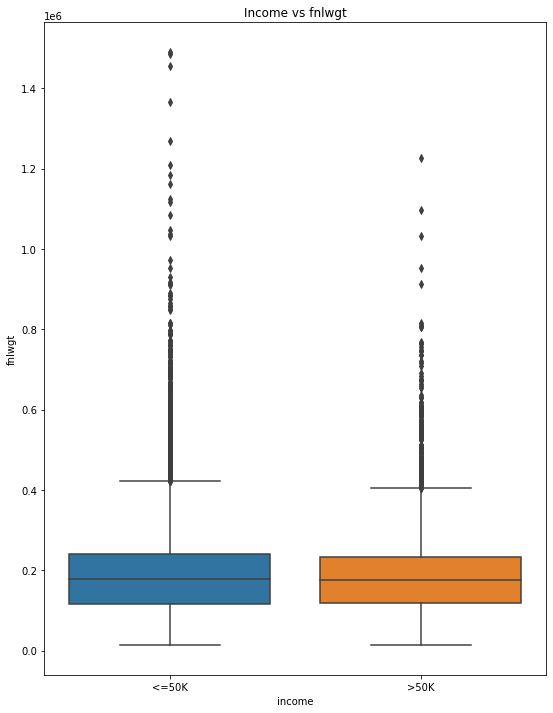

In [ ]:
f, ax = plt.subplots(figsize=(9, 12))
sns.boxplot(x='income', y='fnlwgt', data=data)
plt.title('Income vs fnlwgt')

Text(0.5, 1.0, 'Income vs capital-loss')

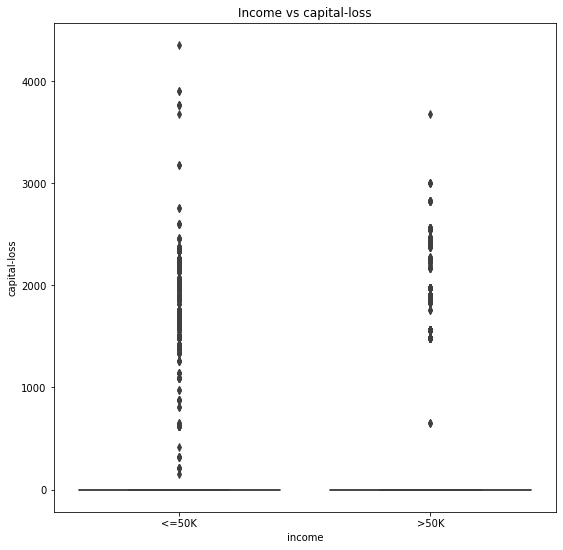

In [ ]:
plt.subplots(figsize=(9, 9))
sns.boxplot(x='income', y='capital-loss', data=data)
plt.title('Income vs capital-loss')

Text(0.5, 1.0, 'Income vs capital-gain')

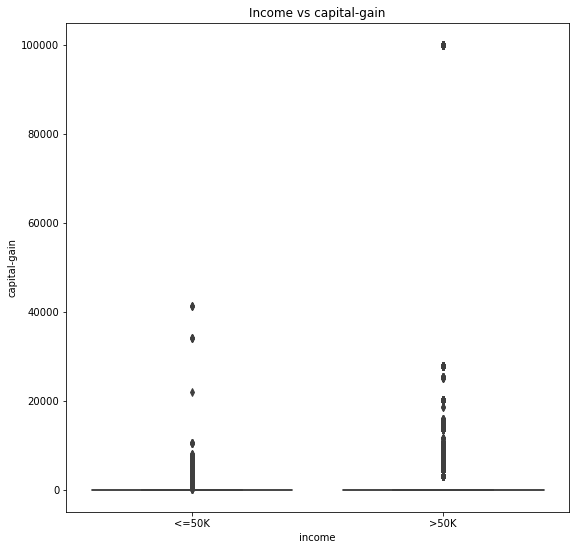

In [ ]:
plt.subplots(figsize=(9, 9))
sns.boxplot(x='income', y='capital-gain', data=data)
plt.title('Income vs capital-gain')

Для сравнения визуализируем то, как целевая переменная коррелирует, например, с возрастом или уровнем образования. Видим, что, чем человек старше и образованнее, тем больше вероятность, что его доход превышает 50 тысяч.

<AxesSubplot:xlabel='income', ylabel='educational-num'>

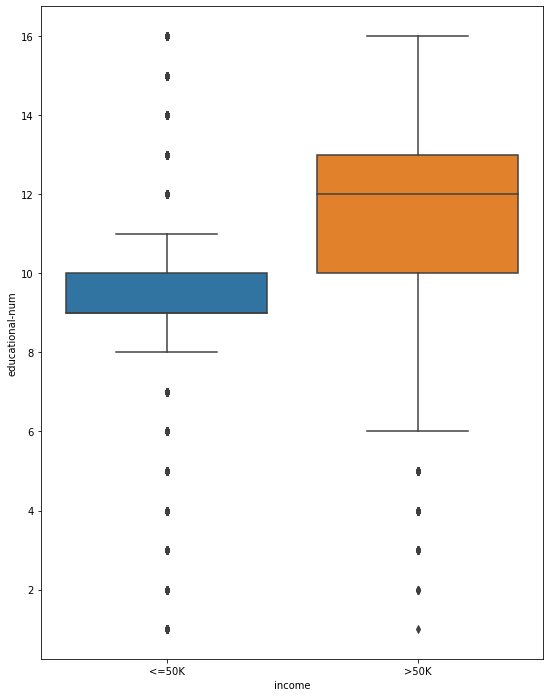

In [ ]:
f, ax = plt.subplots(figsize=(9, 12))
sns.boxplot(x='income', y='educational-num', data=data)
plt.title('Income vs Education')

<AxesSubplot:xlabel='income', ylabel='age'>

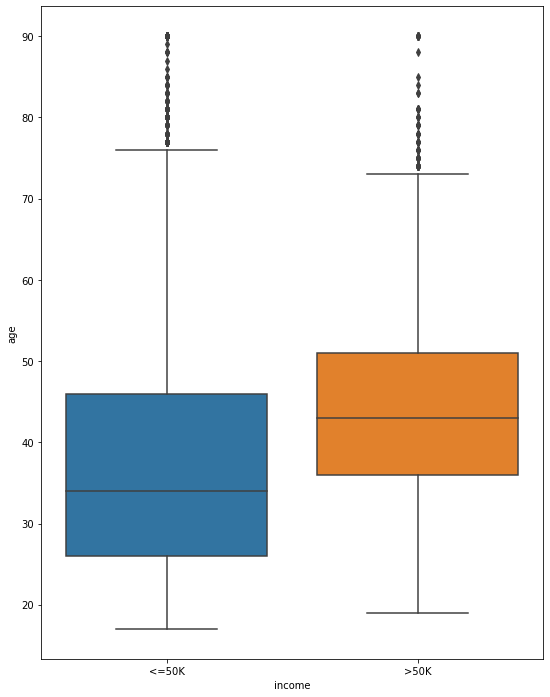

In [ ]:
f, ax = plt.subplots(figsize=(9, 12))
sns.boxplot(x='income', y='age', data=data)
plt.title('Income vs Age')


Признак 'education' также в модель не включаем, так как есть признак 'educational-num', который, по сути, является численным представлением уровня образования.

Признак 'native-country' тоже не включим в модель, так как видим, что около 90 процентов наблюдений - из США.
Если учитывать расовые предрассудки, у нас в модели останется признак 'race'.

In [ ]:
data['native-country'].value_counts()

United-States                 41292
Mexico                          903
Philippines                     283
Germany                         193
Puerto-Rico                     175
Canada                          163
El-Salvador                     147
India                           147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        86
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador                     

Предполагая сильную корреляцию между признаками 'marital-status' и 'relationship', в модели задействуем только первый.

In [ ]:
# отберем столбцы, необходимые для модели
selectedColumns = data[['marital-status', 'race', 'gender', 'age', 'hours-per-week','educational-num', 'occupation', 'workclass', 'income']]

In [ ]:
selectedColumns

,marital-status,race,gender,age,hours-per-week,educational-num,occupation,workclass,income
0,Never-married,Black,Male,25,40,7,Machine-op-inspct,Private,<=50K
1,Married-civ-spouse,White,Male,38,50,9,Farming-fishing,Private,<=50K
2,Married-civ-spouse,White,Male,28,40,12,Protective-serv,Local-gov,>50K
3,Married-civ-spouse,Black,Male,44,40,10,Machine-op-inspct,Private,>50K
5,Never-married,White,Male,34,30,6,Other-service,Private,<=50K
...,...,...,...,...,...,...,...,...,...
48837,Married-civ-spouse,White,Female,27,38,12,Tech-support,Private,<=50K
48838,Married-civ-spouse,White,Male,40,40,9,Machine-op-inspct,Private,>50K
48839,Widowed,White,Female,58,40,9,Adm-clerical,Private,<=50K
48840,Never-married,White,Male,22,20,9,Adm-clerical,Private,<=50K


Строковые данные предварительно переведем в числовые с помощью One Hot Encoding.
Выведем целевую переменную 'income' из X.

In [ ]:
X = pd.get_dummies(selectedColumns, columns=['marital-status','race', 'gender', 'age', 'hours-per-week', 'educational-num', 'occupation', 'workclass'], drop_first=True)
del X['income']

In [ ]:
X

,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,race_Asian-Pac-Islander,race_Black,race_Other,race_White,...,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
48838,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
48839,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
48840,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# закодируем категориальную целевую переменную как 0 и 1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
le.fit(data['income'])

LabelEncoder()

In [ ]:
le.classes_

array(['<=50K', '>50K'], dtype=object)

In [ ]:
# записываем преобразованный столбец 'income' в целевую переменную y
y = pd.Series(data=le.transform(data.income))
y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int32

# Логистическая регрессия

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# используем пайплайны для поочередной стандартизации и обучения модели
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

In [ ]:
# разбиваем выборку на обучающкю и тестовую, фиксируем случайность
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test.index

Int64Index([21762, 21701, 42663, 42694, 13590, 47537, 42284,  2021, 48236,
            46692,
            ...
            15594, 37624, 15046, 42351,  6849, 39182,  3157,  2411, 32125,
            10882],
           dtype='int64', length=9045)

In [ ]:
# обучаем модель на обучающей выборке (train)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [ ]:
# первые пять предсказаний на тестовой выборке
predictions[:5]

array([0, 0, 0, 0, 0])

In [ ]:
# фактические значения целевой переменной
y_test[:5]

20084    0
20027    0
39505    1
39534    0
12586    0
dtype: int32

In [ ]:
# вероятности принаддежности одному из классов на тестовой выборке
model.predict_proba(X_test)

array([[9.99968212e-01, 3.17880896e-05],
       [8.65617515e-01, 1.34382485e-01],
       [5.10812147e-01, 4.89187853e-01],
       ...,
       [6.61064674e-01, 3.38935326e-01],
       [8.60202774e-01, 1.39797226e-01],
       [9.89142878e-01, 1.08571222e-02]])

In [ ]:
# рассчитаем метрику accuracy на обучающей выборке

model.score(X_train, y_train)

0.8360836995881361

In [ ]:
# рассчитаем метрику accuracy на тестовой выборке

model.score(X_test, y_test)

0.8363736871199557

# Метод опорных векторов (SVM)

In [ ]:
from sklearn.svm import SVC

# используем пайплайны для стандартизации и создания модели с полиномиальным ядром
clf = make_pipeline(StandardScaler(), SVC(kernel='poly'))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='poly'))])

In [ ]:
%%timeit

clf = make_pipeline(StandardScaler(), SVC(kernel='poly'))
clf.fit(X_train, y_train)

4min 36s ± 28.6 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
clf.score(X_train, y_train)

0.8287033197888161

In [ ]:
clf.score(X_test, y_test)

0.7964621337755666

Результат обеих моделей (и логистической регрессии, и метода опорных векторов) можно назвать удовлетворительным.

Модель логистической регрессии верно предсказывает уровень дохода в более чем 83 процентах случаев и на обучающей, и на тестовой выборках.

Модель метода опорных векторов с полиномиальным ядром в данном случае показала схожий результат на обучающей выборке (около 83 процентов). Результат на тестовой выборке - чуть хуже (79 процентов). Кроме того, обучение этой модели заняло значительно больше времени. Однако в целом модель адекватна.

При текущем количестве признаков предпочтительной является модель логистической регрессии.

По нашему мнению, необходим более тщательный подбор признаков для модели. Следовало бы оценить внутренние корреляции признаков между собой, их дисперсии.

Анализ внутренних зависимостей осложняется тем, что бОльшая часть признаков - категориальные. Они требуют дополнительного кодирования, а матрицы сопряженности в итоге получаются очень громоздкими.

Большое количество признаков, кроме того, замедляет работу. Так, например, в нашем случае обучение модели методом опорных векторов, в среднем, заняло более 4 минут, притом что наблюдений всего сорок с небольшим тысяч, а в обучающей выборке - еще меньше. Отметим, что при использовании меньшего количества признаков, модель по методу опорных векторов обучалась быстрее и показывала более высокий уровень метрики accuracy.